<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/HW4Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

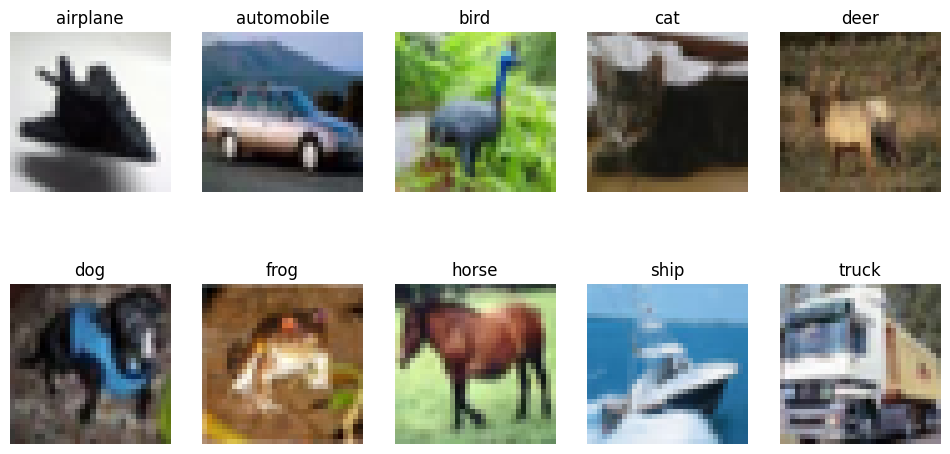

Training with batch_size=32, epochs=10, optimizer=adam
Accuracy: 0.4244
Training with batch_size=32, epochs=10, optimizer=sgd
Accuracy: 0.4479
Training with batch_size=32, epochs=20, optimizer=adam
Accuracy: 0.4149
Training with batch_size=32, epochs=20, optimizer=sgd
Accuracy: 0.4987
Training with batch_size=64, epochs=10, optimizer=adam
Accuracy: 0.4272
Training with batch_size=64, epochs=10, optimizer=sgd
Accuracy: 0.3979
Training with batch_size=64, epochs=20, optimizer=adam
Accuracy: 0.4309
Training with batch_size=64, epochs=20, optimizer=sgd
Accuracy: 0.4863

Best parameters: {'batch_size': 32, 'epochs': 20, 'optimizer': 'sgd'}
Best accuracy: 0.4987
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2737 - loss: 2.0030 - val_accuracy: 0.3528 - val_loss: 1.7905
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3880 - loss: 1.7384 - val_accuracy: 0.3841 - val_loss: 1.7044
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4188

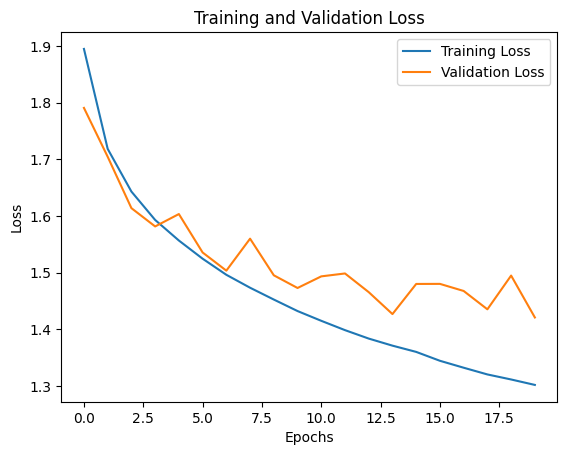

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

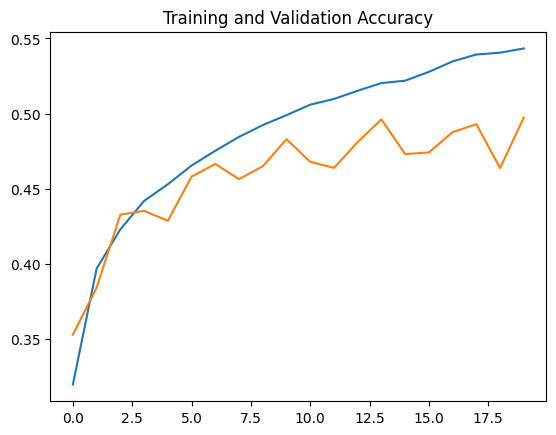

In [12]:
# Install TensorFlow in case it's not available in the Colab environment
!pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# (a) Visualize the data by plotting an image from each category from the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting one image from each class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_images[train_labels.flatten() == i][0])
    ax.set_title(class_names[i])
    ax.axis('off')
plt.show()

# Preprocess the data
train_images = train_images / 255.0  # Normalize images to the range [0, 1]
test_images = test_images / 255.0

# Flatten the images for a fully connected neural network
train_images_flattened = train_images.reshape(-1, 32 * 32 * 3)
test_images_flattened = test_images.reshape(-1, 32 * 32 * 3)

# (b) Hyperparameter tuning via simple manual grid search
def create_model(optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(32 * 32 * 3,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Manually define hyperparameters
batch_sizes = [32, 64]
epochs_values = [10, 20]
optimizers = ['adam', 'sgd']

best_accuracy = 0  # To store the best accuracy score
best_params = {}

# Manual hyperparameter tuning
for batch_size in batch_sizes:
    for epochs in epochs_values:
        for optimizer in optimizers:
            print(f"Training with batch_size={batch_size}, epochs={epochs}, optimizer={optimizer}")

            # Create the model
            model = create_model(optimizer=optimizer)

            # Train the model
            history = model.fit(train_images_flattened, train_labels,
                                epochs=epochs, batch_size=batch_size,
                                validation_data=(test_images_flattened, test_labels),
                                verbose=0)

            # Evaluate the model on the test data
            loss, accuracy = model.evaluate(test_images_flattened, test_labels, verbose=0)

            # Track the best model based on accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer}

            print(f"Accuracy: {accuracy:.4f}")

# Display the best parameters
print(f"\nBest parameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")

# (c) Plotting the training and validation loss for the best model
best_model = create_model(optimizer=best_params['optimizer'])
history = best_model.fit(train_images_flattened, train_labels,
                         epochs=best_params['epochs'],
                         batch_size=best_params['batch_size'],
                         validation_data=(test_images_flattened, test_labels))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# (d) Plotting the training and validation accuracy for the best model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel
